# Análisis de Resultados Electorales 2025

Este notebook contiene el análisis de los datos de las elecciones legislativas 2025.

In [1]:
# Instalar las librerías necesarias (ejecutar solo una vez)
%pip install duckdb pandas
%pip install matplotlib
%pip install plotly nbformat

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importar las librerías necesarias
import duckdb
import pandas as pd

# Leer el archivo parquet usando DuckDB
archivo = 'elecciones_legislativas_2025/ResultadosElectorales.parquet'

# Crear una conexión a DuckDB
conn = duckdb.connect()

# Leer el archivo parquet
df = conn.execute(f"SELECT * FROM '{archivo}'").df()

# Mostrar información básica del dataset
print("=" * 80)
print("INFORMACIÓN DEL DATASET")
print("=" * 80)
print(f"\nDimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\nColumnas: {list(df.columns)}")
print(f"\nTipos de datos:")
print(df.dtypes)
print(f"\n{'=' * 80}")
print("PRIMERAS 10 FILAS")
print("=" * 80)
df.head(10)

INFORMACIÓN DEL DATASET

Dimensiones: 2295376 filas x 26 columnas

Columnas: ['año', 'eleccion_tipo', 'recuento_tipo', 'padron_tipo', 'distrito_id', 'distrito_nombre', 'seccionprovincial_id', 'seccionprovincial_nombre', 'seccion_id', 'seccion_nombre', 'circuito_id', 'circuito_nombre', 'mesa_id', 'mesa_tipo', 'mesa_electores', 'cargo_id', 'cargo_nombre', 'agrupacion_id', 'agrupacion_nombre', 'lista_numero', 'lista_nombre', 'votos_tipo', 'votos_cantidad', 'estado_final', 'eleccion_id', 'recuento_id']

Tipos de datos:
año                         object
eleccion_tipo               object
recuento_tipo               object
padron_tipo                 object
distrito_id                 object
distrito_nombre             object
seccionprovincial_id        object
seccionprovincial_nombre    object
seccion_id                  object
seccion_nombre              object
circuito_id                 object
circuito_nombre             object
mesa_id                     object
mesa_tipo               

,año,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre,...,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad,estado_final,eleccion_id,recuento_id
0,2025,GENERALES,PROVISORIO,NORMAL,1,CIUDAD AUTÓNOMA DE BUENOS AIRES,None,None,1,COMUNA 1,...,SENADOR NACIONAL,120,FUERZA PATRIA,None,None,POSITIVO,89,ESCRUTADO,2,1
1,2025,GENERALES,PROVISORIO,NORMAL,1,CIUDAD AUTÓNOMA DE BUENOS AIRES,None,None,1,COMUNA 1,...,SENADOR NACIONAL,6,ALIANZA LA LIBERTAD AVANZA,None,None,POSITIVO,74,ESCRUTADO,2,1
2,2025,GENERALES,PROVISORIO,NORMAL,1,CIUDAD AUTÓNOMA DE BUENOS AIRES,None,None,1,COMUNA 1,...,SENADOR NACIONAL,31,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,None,None,POSITIVO,17,ESCRUTADO,2,1
3,2025,GENERALES,PROVISORIO,NORMAL,1,CIUDAD AUTÓNOMA DE BUENOS AIRES,None,None,1,COMUNA 1,...,SENADOR NACIONAL,268,CIUDADANOS UNIDOS,None,None,POSITIVO,9,ESCRUTADO,2,1
4,2025,GENERALES,PROVISORIO,NORMAL,1,CIUDAD AUTÓNOMA DE BUENOS AIRES,None,None,1,COMUNA 1,...,SENADOR NACIONAL,7,PARTIDO FEDERAL,None,None,POSITIVO,3,ESCRUTADO,2,1
5,2025,GENERALES,PROVISORIO,NORMAL,1,CIUDAD AUTÓNOMA DE BUENOS AIRES,None,None,1,COMUNA 1,...,SENADOR NACIONAL,4,ALIANZA POTENCIA,None,None,POSITIVO,1,ESCRUTADO,2,1
6,2025,GENERALES,PROVISORIO,NORMAL,1,CIUDAD AUTÓNOMA DE BUENOS AIRES,None,None,1,COMUNA 1,...,SENADOR NACIONAL,11,FRENTE PATRIOTA FEDERAL,None,None,POSITIVO,1,ESCRUTADO,2,1
7,2025,GENERALES,PROVISORIO,NORMAL,1,CIUDAD AUTÓNOMA DE BUENOS AIRES,None,None,1,COMUNA 1,...,SENADOR NACIONAL,2,GEN,None,None,POSITIVO,1,ESCRUTADO,2,1
8,2025,GENERALES,PROVISORIO,NORMAL,1,CIUDAD AUTÓNOMA DE BUENOS AIRES,None,None,1,COMUNA 1,...,SENADOR NACIONAL,267,HAGAMOS FUTURO,None,None,POSITIVO,1,ESCRUTADO,2,1
9,2025,GENERALES,PROVISORIO,NORMAL,1,CIUDAD AUTÓNOMA DE BUENOS AIRES,None,None,1,COMUNA 1,...,SENADOR NACIONAL,3,LA IZQUIERDA EN LA CIUDAD,None,None,POSITIVO,1,ESCRUTADO,2,1


In [3]:
# Obtener todas las secciones únicas de CABA
secciones_caba = df[df['distrito_nombre'] == 'CIUDAD AUTÓNOMA DE BUENOS AIRES']['seccion_nombre'].unique()

print("SECCIONES EN CIUDAD AUTÓNOMA DE BUENOS AIRES")
print("=" * 60)
for seccion in sorted(secciones_caba):
    print(seccion)

SECCIONES EN CIUDAD AUTÓNOMA DE BUENOS AIRES
COMUNA 1
COMUNA 10
COMUNA 11
COMUNA 12
COMUNA 13
COMUNA 14
COMUNA 15
COMUNA 2
COMUNA 3
COMUNA 4
COMUNA 5
COMUNA 6
COMUNA 7
COMUNA 8
COMUNA 9


In [4]:
# Convertir votos_cantidad a entero numérico
df['votos_cantidad'] = pd.to_numeric(df['votos_cantidad'], errors='coerce').fillna(0).astype(int)

# Agrupar por partido y sumar los votos
votos_por_partido = (
    df.groupby("agrupacion_nombre")["votos_cantidad"]
    .sum()
    .reset_index()
    .sort_values(by="votos_cantidad", ascending=False)
)

# Renombrar columnas
votos_por_partido.columns = ['Partido', 'Votos']

# Mostrar el resultado completo
print(votos_por_partido.to_string(index=False))


                                           Partido   Votos
                        ALIANZA LA LIBERTAD AVANZA 8830888
                             ALIANZA FUERZA PATRIA 3657285
                                     FUERZA PATRIA 2851410
                                LA LIBERTAD AVANZA 2704662
    FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD  997097
                         ALIANZA PROVINCIAS UNIDAS  762798
                        FRENTE CÍVICO POR SANTIAGO  606990
                            FRENTE TUCUMÁN PRIMERO  524057
                                 FUERZA ENTRE RÍOS  515702
                              PRIMERO LOS SALTEÑOS  395426
                                 PROVINCIAS UNIDAS  330089
                      FUERZA JUSTICIALISTA MENDOZA  253109
                  PROPUESTA FEDERAL PARA EL CAMBIO  243326
                                    LA NEUQUINIDAD  240697
                    FRENTE FUERZA PATRIA PERONISTA  227344
                       JUNTOS DEFENDEMOS RÍO NEGRO  2082

In [5]:
# Primero verificar los nombres exactos de los partidos en CABA
df_caba = df[df['distrito_nombre'] == 'CIUDAD AUTÓNOMA DE BUENOS AIRES'].copy()
df_caba['votos_cantidad'] = pd.to_numeric(df_caba['votos_cantidad'], errors='coerce').fillna(0).astype(int)

print("Partidos que contienen 'LIBERTAD' o 'PATRIA' en CABA:")
partidos_relevantes = df_caba[df_caba['agrupacion_nombre'].str.contains('LIBERTAD|PATRIA', case=False, na=False)]['agrupacion_nombre'].unique()
for partido in partidos_relevantes:
    votos = df_caba[df_caba['agrupacion_nombre'] == partido]['votos_cantidad'].sum()
    print(f"  {partido}: {votos:,} votos")

print("\n" + "="*80 + "\n")

# Crear la tabla pivote con los dos partidos
# Agrupar por partido y comuna, sumando votos
tabla_votos = df_caba.groupby(['agrupacion_nombre', 'seccion_nombre'])['votos_cantidad'].sum().reset_index()

# Crear tabla pivote: partidos en filas, comunas en columnas
tabla_completa = tabla_votos.pivot(index='agrupacion_nombre', columns='seccion_nombre', values='votos_cantidad').fillna(0).astype(int)

# Filtrar solo los dos partidos que nos interesan (usar el nombre exacto que aparece en los datos)
# Buscar el partido que contiene "PATRIA"
partido_patria = [p for p in tabla_completa.index if 'PATRIA' in p][0]
tabla_final = tabla_completa.loc[['ALIANZA LA LIBERTAD AVANZA', partido_patria]]

# Ordenar las columnas (comunas) alfabéticamente
tabla_final = tabla_final.reindex(sorted(tabla_final.columns), axis=1)

print("VOTOS POR PARTIDO Y COMUNA EN CABA")
print("="*120)
# Configurar pandas para mostrar todas las columnas sin saltos de línea
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
print(tabla_final.to_string())

# Mostrar totales por partido
print("\n" + "="*120)
print("TOTALES POR PARTIDO:")
for partido in tabla_final.index:
    print(f"{partido}: {tabla_final.loc[partido].sum():,} votos")

Partidos que contienen 'LIBERTAD' o 'PATRIA' en CABA:
  FUERZA PATRIA: 951,139 votos
  ALIANZA LA LIBERTAD AVANZA: 1,612,038 votos


VOTOS POR PARTIDO Y COMUNA EN CABA
seccion_nombre              COMUNA 1  COMUNA 10  COMUNA 11  COMUNA 12  COMUNA 13  COMUNA 14  COMUNA 15  COMUNA 2  COMUNA 3  COMUNA 4  COMUNA 5  COMUNA 6  COMUNA 7  COMUNA 8  COMUNA 9
agrupacion_nombre                                                                                                                                                                     
ALIANZA LA LIBERTAD AVANZA    101810      92933     117076     130625     170558     156434      93853    110221     85041     93850     84132    105647    106770     73475     89613
FUERZA PATRIA                  59849      61507      67095      72115      56248      53756      72543     28825     61533     82987     65446     61518     71157     70499     66061

TOTALES POR PARTIDO:
ALIANZA LA LIBERTAD AVANZA: 1,612,038 votos
FUERZA PATRIA: 951,139 votos


Gráfico guardado en: grafico_1_FUERZA_PATRIA.png


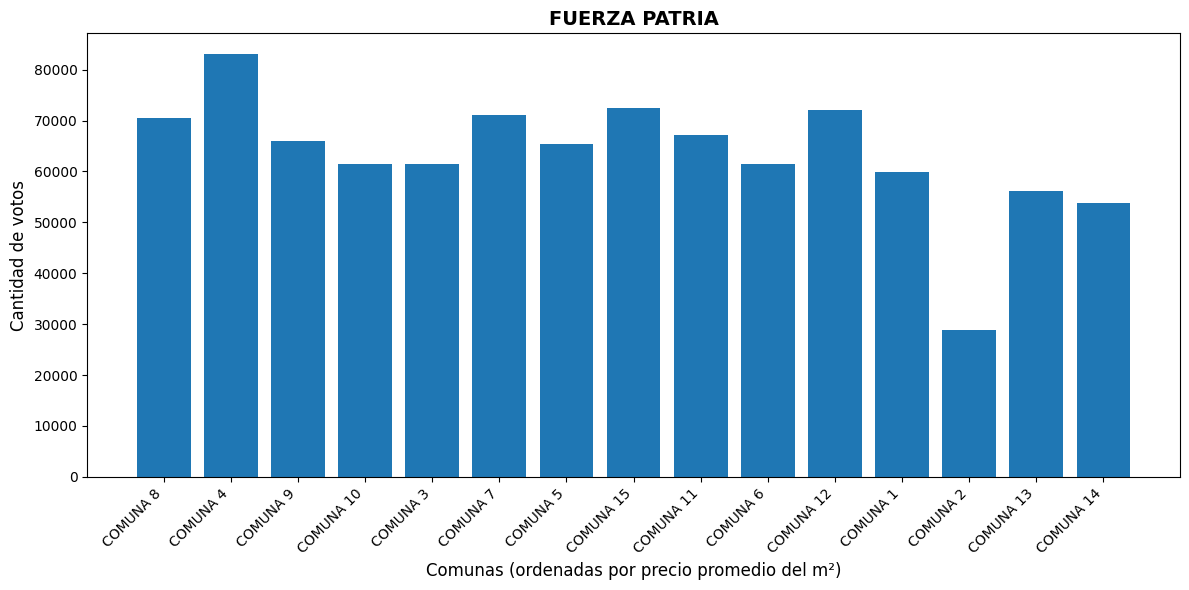

Gráfico guardado en: grafico_2_ALIANZA_LA_LIBERTAD_AVANZA.png


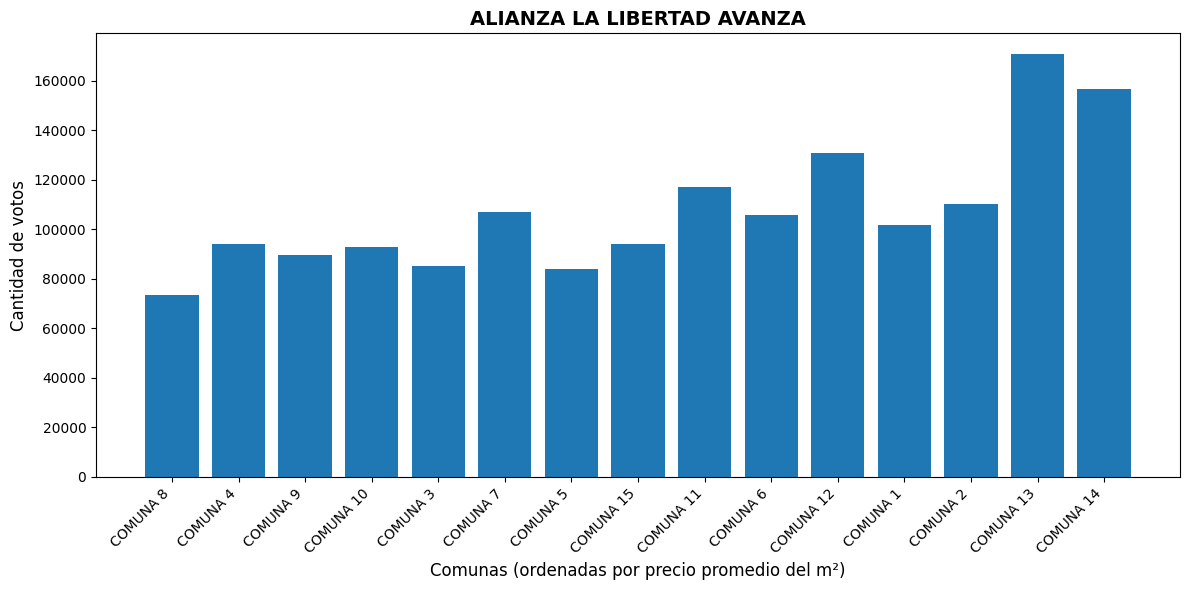

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Leer los CSV
df_votos = pd.read_csv('elecciones_legislativas_2025/caba.csv')
df_precios = pd.read_csv('elecciones_legislativas_2025/m2.csv')

# Transformar el DataFrame de votos de formato ancho a largo
df_votos_largo = df_votos.melt(
    id_vars=['agrupacion_nombre'], 
    var_name='comuna', 
    value_name='votos'
)

# Unir con el DataFrame de precios
df_merged = df_votos_largo.merge(df_precios, on='comuna')

# Ordenar por precio de m² para cada partido
df_merged = df_merged.sort_values('precio_promedio_m2_USD')

# Obtener los dos partidos
partidos = df_merged['agrupacion_nombre'].unique()

# Crear gráficos separados para cada partido
for i, partido in enumerate(partidos):
    df_partido = df_merged[df_merged['agrupacion_nombre'] == partido]
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(df_partido['comuna'], df_partido['votos'])
    ax.set_title(partido, fontsize=14, fontweight='bold')
    ax.set_xlabel('Comunas (ordenadas por precio promedio del m²)', fontsize=12)
    ax.set_ylabel('Cantidad de votos', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    plt.setp(ax.get_xticklabels(), ha='right')
    ax.set_ylim(0, None)
    plt.tight_layout()
    
    # Guardar también como archivo
    nombre_archivo = f'grafico_{i+1}_{partido.replace(" ", "_")}.png'
    plt.savefig(nombre_archivo, dpi=100, bbox_inches='tight')
    print(f"Gráfico guardado en: {nombre_archivo}")
    
    plt.show()
    plt.close()

In [8]:
import pandas as pd
import plotly.express as px

df_votos = pd.read_csv('elecciones_legislativas_2025/caba.csv')
df_precios = pd.read_csv('elecciones_legislativas_2025/m2.csv')

df_votos_largo = df_votos.melt(
    id_vars=['agrupacion_nombre'], 
    var_name='comuna', 
    value_name='votos'
)

df_merged = df_votos_largo.merge(df_precios, on='comuna')
df_merged = df_merged.sort_values('precio_promedio_m2_USD')

partidos = ['ALIANZA LA LIBERTAD AVANZA', 'FUERZA PATRIA']
df_final = df_merged[df_merged['agrupacion_nombre'].isin(partidos)]

colores = {
    'ALIANZA LA LIBERTAD AVANZA': '#8B00FF',
    'FUERZA PATRIA': '#00BFFF'
}

fig = px.bar(
    df_final,
    x='comuna',
    y='votos',
    color='agrupacion_nombre',
    barmode='group',
    title='Votos por Comuna en CABA - Elecciones 2025',
    labels={
        'comuna': 'Comunas (ordenadas por precio promedio del m²)',
        'votos': 'Cantidad de votos',
        'agrupacion_nombre': 'Partido'
    },
    color_discrete_map=colores,
    hover_data={
        'agrupacion_nombre': True,
        'comuna': True,
        'votos': True,
        'precio_promedio_m2_USD': ':.2f'
    }
)

fig.update_yaxes(range=[0, df_final['votos'].max() * 1.1])
fig.update_layout(height=600, xaxis_tickangle=-45)

fig.show()